In [ ]:
# Run this cell to install the necessary libraries
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install statsmodels

In [24]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load the dataset
df = pd.read_csv('structured_endometriosis_data.csv')

# Display first few rows
df.head()

,Age,Menstrual_Irregularity,Chronic_Pain_Level,Hormone_Level_Abnormality,Infertility,BMI,Diagnosis
0,24,1,8.361531,0,0,19.451314,0
1,37,1,4.995508,0,0,22.388436,0
2,46,1,3.363996,1,0,21.320443,0
3,32,1,5.246037,0,0,20.177715,1
4,28,1,3.898932,1,0,23.538103,1


In [6]:
# Get a quick overview of the data structure (column names, data types, non-null counts)
df.info()
# See how many missing values are in each column
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        10000 non-null  int64  
 1   Menstrual_Irregularity     10000 non-null  int64  
 2   Chronic_Pain_Level         10000 non-null  float64
 3   Hormone_Level_Abnormality  10000 non-null  int64  
 4   Infertility                10000 non-null  int64  
 5   BMI                        10000 non-null  float64
 6   Diagnosis                  10000 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 547.0 KB


Age                          0
Menstrual_Irregularity       0
Chronic_Pain_Level           0
Hormone_Level_Abnormality    0
Infertility                  0
BMI                          0
Diagnosis                    0
dtype: int64

In [7]:
# Let's see the column names again to be sure
print(df.columns.tolist())

['Age', 'Menstrual_Irregularity', 'Chronic_Pain_Level', 'Hormone_Level_Abnormality', 'Infertility', 'BMI', 'Diagnosis']


In [38]:
# Create the two age groups:
# Group 1: Women under 25
under_25 = df[df['Age'] < 25]
# Group 2: Women 25 and over
over_25 = df[df['Age'] >= 25]

# Count the number of diagnoses in each group
# (Assuming 'Diagnosis' is a column with 1 for 'Has Endometriosis' and 0 for 'Does Not')
# If your column is named differently (e.g., 'Target', 'HasEndo'), change it here.
count_under_25 = under_25['Diagnosis'].sum()  # Sums all the 1s
count_over_25 = over_25['Diagnosis'].sum()

# Print the counts to check your work
print(f"Number of endometriosis cases in women under 25: {count_under_25}")
print(f"Number of endometriosis cases in women 25 and over: {count_over_25}")


Number of endometriosis cases in women under 25: 873
Number of endometriosis cases in women 25 and over: 3206


In [39]:
# Data to plot
counts = [count_under_25, count_over_25]
labels = ['Women Under 25', 'Women 25 & Over']

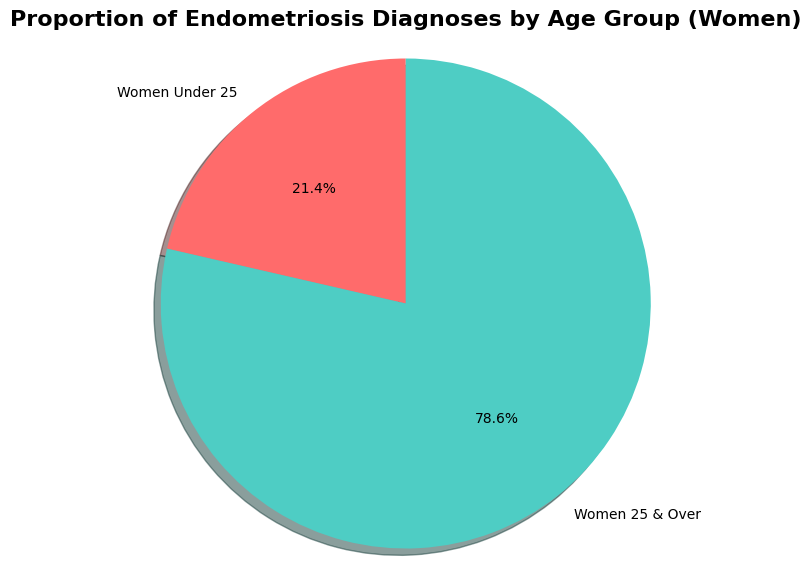

In [40]:
plt.figure(figsize=(10, 7))

# Define colors for the slices
colors = ['#ff6b6b', '#4ecdc4']  # Coral and Teal

# Create the pie chart
plt.pie(
    counts,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',  # Show percentages
    startangle=90,      # Start the first slice at the top
    shadow=True         # Add a slight shadow for depth
)

# Add a title
plt.title('Proportion of Endometriosis Diagnoses by Age Group (Women)', fontsize=16, fontweight='bold')

# Ensure the pie is drawn as a circle
plt.axis('equal')

# Display the chart
plt.show()

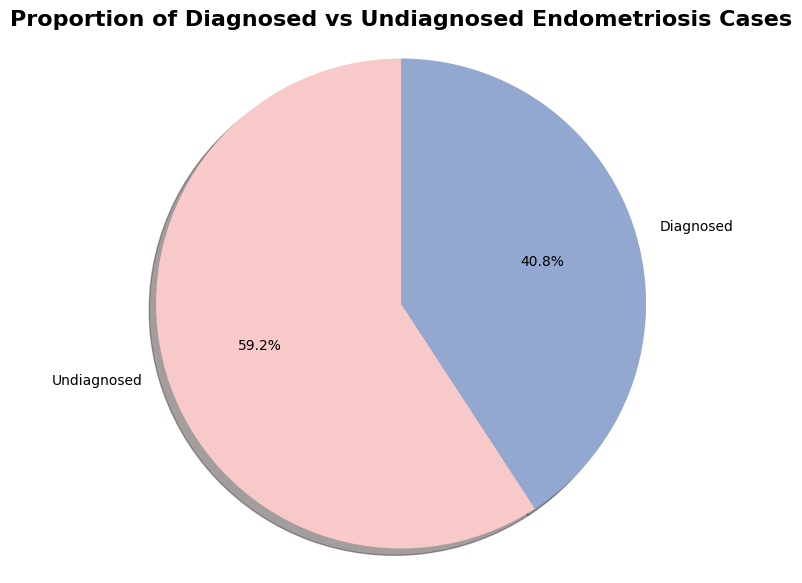

In [12]:
# Undiagnosed cases vs Diagnosed cases
# Count diagnosed and undiagnosed cases
diagnosed_count = df['Diagnosis'].sum()  # Total diagnosed cases
undiagnosed_count = len(df) - diagnosed_count  # Total undiagnosed cases
# Data to plot
counts = [undiagnosed_count, diagnosed_count]
labels = ['Undiagnosed', 'Diagnosed']
plt.figure(figsize=(10, 7))
# Define colors for the slices
colors = ['#f7cac9', '#92a8d1']  # Light Pink and Light Blue
# Create the pie chart
plt.pie(
    counts,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',  # Show percentages
    startangle=90,      # Start the first slice at the top
    shadow=True         # Add a slight shadow for depth
)       
# Add a title
plt.title('Proportion of Diagnosed vs Undiagnosed Endometriosis Cases', fontsize=16, fontweight='bold')
# Ensure the pie is drawn as a circle
plt.axis('equal')
# Display the chart
plt.show()

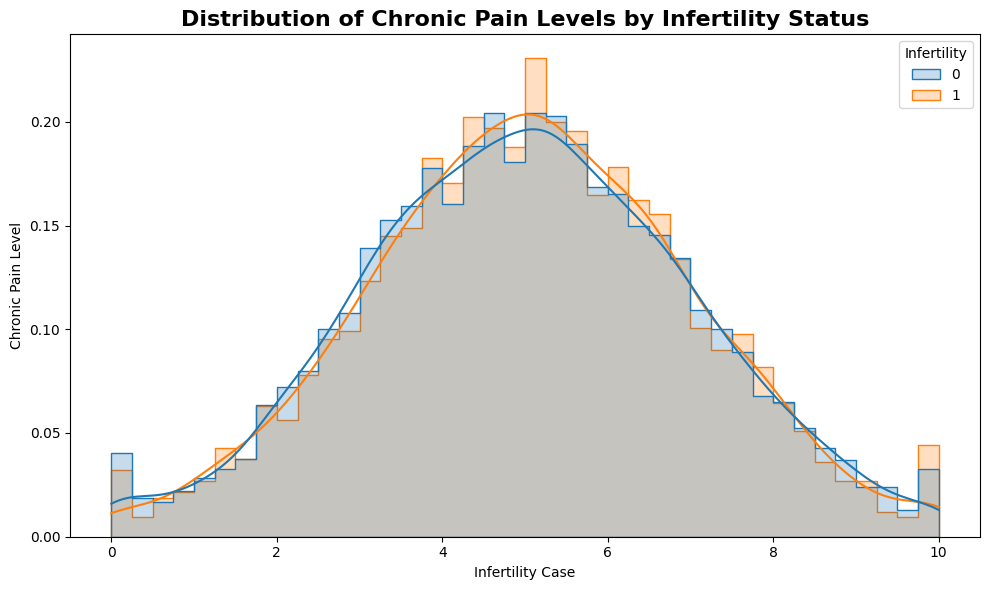

In [ ]:
#Chronic Pain Level Distribution by Infertility Status

plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='Chronic_Pain_Level', hue='Infertility', kde=True, element='step', stat='density', common_norm=False)

plt.title('Comparison of Pain Level Distributions')

plt.title('Distribution of Chronic Pain Levels by Infertility Status', fontsize=16, fontweight='bold')
plt.xlabel('Infertility Case')
plt.ylabel('Chronic Pain Level')
plt.tight_layout()
plt.show()

In [ ]:
# Define your variables (adjust column names as needed)
X = df[['Chronic_Pain_Level']]  # Independent variable (feature)
y = df['Infertility']   # Dependent variable (target)

# Add a constant (intercept) to the model. This is required for statsmodels.
X = sm.add_constant(X) 

model = sm.Logit(y, X)
result = model.fit()

print(result.summary()) 

Optimization terminated successfully.
         Current function value: 0.609374
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            Infertility   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Mon, 01 Sep 2025   Pseudo R-squ.:               7.096e-05
Time:                        22:22:40   Log-Likelihood:                -6093.7
converged:                       True   LL-Null:                       -6094.2
Covariance Type:            nonrobust   LLR p-value:                    0.3524
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.9070      0.060    -15.180      0.000      -1.024      -0.790
Chron

## Interpretation & Conclusion

### Summary of Logistic Regression Results
The model aimed to predict the probability of an infertility case based on a patient's chronic pain level.

The resulting prediction equation was:
Log-Odds of Infertility = -0.9070 + (0.0102 × Chronic_Pain_Level)

### Key Findings
*   **Coefficient for Pain Level:** `0.0102`
    *   A positive value indicates that higher pain levels are associated with a higher predicted probability of infertility.
*   **P-Value for Pain Level:** `0.352`
    *   **This value is greater than the standard significance threshold of 0.05.**
    *   Therefore, we **cannot reject the null hypothesis**. There is no statistically significant evidence in this dataset to conclude that chronic pain level is a meaningful predictor of infertility cases. The observed relationship is likely due to random chance.

### **Predicted Probability Examples**
To illustrate the model's minimal predictive power:
| Pain Level | Predicted Probability of Infertility |
| :--- | :--- |
| 0 | 28.8% |
| 5 | 29.8% |
| 10 | 30.9% |

The model shows a very weak positive trend, but the effect is negligible (a ~2% increase in probability across the entire pain scale).

### **Conclusion**
Based on this analysis, **chronic pain level is not a significant driver of infertility diagnoses** within this patient cohort. Future analysis should focus on other potential factors such as hormonal levels, specific medical history, or other diagnostic markers.